<a href="https://colab.research.google.com/github/claytonsilva007/datascience/blob/master/diferenca_salarial_raca_sexo_executivo_federal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Objetivos da análise**
        
O objetivo desta análise é verificar a existência possíveis diferenças remuneratórias entre homens e mulheres, brancos e negros no âmbito do Poder Executivo Federal entre os anos de 1999 e 2020.

## **2. Análise preliminar**
O levantamento dos números que embasaram essa análise são provenientes da média salarial de toda série histórica (1999-2020). Após isso, os dados foram segmentados por sexo e raça, conforme demonstrado na Seção [2.1](#sexo_raca_id). Feita essa observação inicial, destacamos o seguinte:
1.   As **mulheres** receberam cerca de **10,7% menos** que os **homens**, em média. (Seção [2.1.1.2](#diferenca-percentual-sal-hm)) 
2.  Os **negros** recebem cerca de **27.18% menos** que os **brancos**, em média.(Seção [2.1.2.2](#diferenca-salarial-por-raca))
3. Entre **homens**, constatamos que os **negros** receberam, em média, **29,44% menos** que os os **brancos**. (Seção [2.1.3.2](#dif-remuneracao-percentual-raca-sexo))
4. Entre **mulheres**, constatamos que, em média, as **negras** recebem **24,58% menos** que os os **brancas**. (Seção [2.1.3.2](#dif-remuneracao-percentual-raca-sexo))

Considerando os dados apresentados, constata-se que existem diferenças remuneratórias entre homens e mulheres, brancos e negros. As possíveis razões para essas diferenças remuneratórias serão apresentadas na SEÇÃO xxxxxxxxxx.


## **3.   Análise da diferença salarial média ao longo da série histórica (1999-2020)**
Com o intuito de obter informações mais detalhadas, nesta seção, iremos apresentar dados relativos à diferença salarial existente entre brancos e negros, homens e mulheres ao longo de toda série histórica, trazendo ao debate fatos relevantes para o endereçamento das conclusões que podem ser tiradas a partir fatos ora apresentados. 

### **3.1.  Evolução histórica das diferenças remuneratórias entre brancos de negros**
1. No ano de 2004, a diferença remuneratória entre brancos e negros alcançou seu ponto mais baixo da série histórica, alcançando o percentual de **24.22%**. Em média, essa diferença percentual correponde, em média, ao valor de **RS 1.316,20**. (Seção [2.2.1.2](#secao-2.2.1.2))
2. No ano de 2009, essa diferença subiu para **29.97%**, atingindo o maior patamar de toda série histórica. Em termos pecuniários, essa diferença percentual corresponde, em média, ao valor de **RS 2.307,90**. (Seção [2.2.1.2](#secao-2.2.1.2))     

### **3.2.  Evolução histórica das diferenças remuneratórias entre homens de mulheres**
1. Entre os anos de 2008 e 2013, observou-se que a diferença salarial de homens e mulheres sofreu forte redução, saindo de **15.13%** em 2008 e batendo a mínima histórica de **6.77%** no ano de 2013, performando uma queda de aproximadamente **55%**. (Seção [2.2.2.2](#secao-2.2.2.2))



## **1. Basic Data Processing**

#### Imports

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [318]:
sns.set_theme(color_codes=True)

#### Loading datasets

In [319]:
URL_DATASET = "https://www.ipea.gov.br/atlasestado/arquivos/downloads/5233-liquidosexoraca.csv"

In [320]:
def get_dataset(path):
  return pd.read_csv(URL_DATASET, sep=";", decimal=",")

#### Functions

`rename_column(dataframe, old, new):` *Retorna um novo dataframe com colunas renomeadas*

***Parâmetros***:

1.   *dataframe*: Objeto do tipo dataframe que terá colunas renomeadas.
2.   *old*: Nome da coluna que será renomeada.
3.   *new*: Nome que será atribuído à coluna.

In [321]:
def rename_column(dataframe, old, new):
  dataframe = dataframe.rename(columns={old: new})
  return dataframe

`split_column(column_name, dataframe, token, left_name, rigth_name)`: *Realiza divisão de uma coluna utilizando token separador, retornando um novo dataframe com as colunas resultantes da separação (split)*

***Parâmetros***

1.   *column_name*: Nome da coluna que será dividida.
2.   *dataframe*: Dataframe que terá a operação de split realizada.
3.   *token*: Caracter utilizado para dividir as colunas.
4.   *left_name*: Nome da coluna à esquerda do split.
5.   *rigth_name*: Nome da coluna à direita do split.

In [322]:
def split_column(column_name, dataframe, token, left_name, rigth_name):
  dataframe[[left_name, rigth_name]] = dataframe['sexo_raça'].str.split(token, 1, expand=True)
  return df

`replace_words(dicionario, dataframe, column_name)`: *Substitui o conteúdo de uma coluna específica, retornando um novo dataframe.*

***Parâmetros***

1.   *dicionario*: Dicionário cuja chave e valor representam, respectivamente, as palavras substituídas e substitutas.
2.   *dataframe*: Dataframe cujo conteúdo será atualizado.
3.   *column_name*: Nome da coluna cujo conteúdo será alterado.

In [323]:
def replace_words(dicionario, dataframe, column_name):
  for key in dicionario:
    value = dicionario[key]
    dataframe[column_name] = dataframe[column_name].str.replace(key, value)
  return dataframe

`alter_type(column_name, tp, dataframe)`: *Altera o tipo de uma coluna passada por parâmetro, retornando um novo dataframe.*

***Parâmetros***

1.   *column_name*: Nome da coluna cujo tipo será alterado.
2.   *tp*: Tipo que será atribuído à coluna informada por parâmetro.
3.   *dataframe*: Dataframe cuja coluna terá seu tipo alterado.

In [324]:
def alter_type(column_name, tp, dataframe):
  return dataframe.astype({column_name: tp}, errors='raise')

In [325]:
def get_percentage(val_ref, param):
  diff = val_ref - param
  return (diff/val_ref)*100

#### Transform data

In [326]:
cols = ['ano', 'sexo', 'raca', 'remuneracao']

In [327]:
df = get_dataset(URL_DATASET)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88 non-null     int64  
 1   ano         88 non-null     int64  
 2   sexo_raça   88 non-null     object 
 3   liquido     88 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ KB


In [329]:
# Alterando o tipo da coluna para float.
df = alter_type('liquido', float, df)

In [330]:
# Renomando colunas
df = rename_column(df, 'Unnamed: 0', 'indice')
df = rename_column(df, 'liquido', 'remuneracao')

In [331]:
# Dividindo a coluna sexo_raca 
df = split_column('sexo_raca', df, ' ', 'sexo', 'raca')

In [332]:
# Criando dicionário para padronização da raça. 
dict_racas = {'Branco': 'Branca', 'Negro': 'Negra'}

In [333]:
# Ajustando o conteúdo da coluna raça
df = replace_words(dict_racas, df, 'raca')

## **2. Exploratory data analysis**

<a name="sexo_raca_id"></a>
### **2.1 Diferenças remuneratórias médias entre entre homens e mulheres, brancos e negros**

#### **2.1.1 Diferenças remuneratórias médias por sexo**

##### **2.1.1.1 Preparando os dados**

In [334]:
# Calculando a média salarial acumulada em toda a série.
grouped = df[['sexo', 'remuneracao']].groupby(['sexo'], as_index=False).mean()

# Obtendo o valor de remuneração dos homens
gh = grouped[grouped['sexo']=='Homem']
remuneracao_homens = gh['remuneracao'].values[0]

# Obtendo o valor de remuneração das mulheres
gm = grouped[grouped['sexo']=='Mulher']
remuneracao_mulheres = gm['remuneracao'].values[0]

# Calculando a diferença absoluta e percentual entre 
# os salários de homens e mulheres
diferenca_remuneracao = remuneracao_homens - remuneracao_mulheres
percentual_diferenca = get_percentage(remuneracao_homens, remuneracao_mulheres) 

In [335]:
percentual_diferenca

10.702160414105188

In [336]:
percentual_diferenca

10.702160414105188

<a name="diferenca-percentual-sal-hm"></a>
##### **2.1.1.2 Gráfico - Remuneração média por sexo**

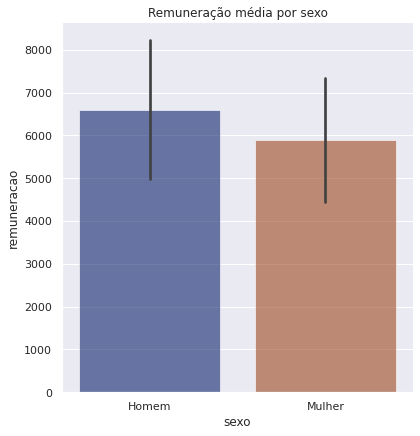

In [337]:
g_remuneracao_sexo = sns.catplot(data=df, x='sexo', y='remuneracao', kind='bar', ci="sd", palette="dark", alpha=.6, height=6)
g_remuneracao_sexo.set(title='Remuneração média por sexo')

In [338]:
get_percentage(remuneracao_homens, remuneracao_mulheres) 

10.702160414105188

#### **2.1.2 Diferenças remuneratórias médias por raça**

##### **2.1.2.1 Processamento dos dados**

In [339]:
# Calculando a média salarial acumulada em toda a série por raça.
grouped = df[['raca', 'remuneracao']].groupby(['raca'], as_index=False).mean()

# Obtendo o valor de remuneração das pessoas de raça branca
pb = grouped[grouped['raca']=='Branca']
remuneracao_brancos = pb['remuneracao'].values[0]

# Obtendo o valor de remuneração das pessoas de raça branca
pn = grouped[grouped['raca']=='Negra']
remuneracao_negros = pn['remuneracao'].values[0]

# Calculando a diferença salarial média entre brancos e negros,
# independente do sexo
diferenca_remuneracao = remuneracao_brancos - remuneracao_negros

# Calculando a diferença percentual entre as remunerações de brancos e negros
percentual_diferenca_brancos_negros = get_percentage(remuneracao_brancos, remuneracao_negros)

In [340]:
grouped

,raca,remuneracao
0,Branca,7228.568182
1,Negra,5263.411364


In [341]:
percentual_diferenca_brancos_negros

27.185976098623833

<a name="diferenca-salarial-por-raca"></a>
##### **2.1.2.2 Gráfico - Diferenças salariais por raça**

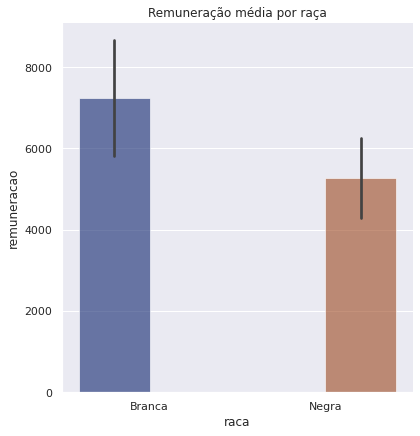

In [342]:
g_remuneracao_sexo_raca = sns.catplot(data=df, x='raca', y='remuneracao', kind='bar', hue='raca', ci="sd", palette="dark", alpha=.6, height=6)
g_remuneracao_sexo_raca.set(title='Remuneração média por raça')

In [343]:
get_percentage(remuneracao_brancos, remuneracao_negros)

27.185976098623833

#### **2.1.3 Diferenças remuneratórias médias para um mesmo sexo e raça diferentes**.

##### **2.1.3.1 Preparando dados**

In [344]:
# Calculando a média salarial acumulada em toda a série por sexo e raça.
grouped = df[cols].groupby(['sexo', 'raca'], as_index=False).mean()

In [345]:
# Obtendo o valor de remuneração dos homens brancos
hbranco = grouped[(grouped['sexo']=='Homem') & (grouped['raca']=='Branca')]
homem_branco_remuneracao = hbranco['remuneracao'].values[0]

# Obtendo o valor de remuneração dos homens negros
hnegro = grouped[(grouped['sexo']=='Homem') & (grouped['raca']=='Negra')]
homem_negro_remuneracao = hnegro['remuneracao'].values[0]

# Diferença de remuneração entre homens brancos e negros
diferenca_remuneracao_homens = homem_branco_remuneracao - homem_negro_remuneracao

# Diferença percentual remuneratória entre brancos e negros
percentual_diferenca_homens_brancos_negros = get_percentage(homem_branco_remuneracao, homem_negro_remuneracao)

In [346]:
percentual_diferenca_homens_brancos_negros

29.44130412691178

In [347]:
# Obtendo o valor de remuneração das mulheres brancas
mbranca = grouped[(grouped['sexo']=='Mulher') & (grouped['raca']=='Branca')]
mulher_branca_remuneracao = mbranca['remuneracao'].values[0]

# Obtendo o valor de remuneração das mulheres negras
mnegra = grouped[(grouped['sexo']=='Mulher') & (grouped['raca']=='Negra')]
mulher_negra_remuneracao = mnegra['remuneracao'].values[0]

# Diferença de remuneração entre mulheres brancas e negras
diferenca_remuneracao_mulheres = mulher_branca_remuneracao - mulher_negra_remuneracao

# Diferença percentual remuneratória entre brancos e negros
percentual_diferenca_mulheres_brancas_negras = get_percentage(mulher_branca_remuneracao, mulher_negra_remuneracao)

In [348]:
percentual_diferenca_mulheres_brancas_negras

24.588491495163915

<a name="dif-remuneracao-percentual-raca-sexo"></a>
##### **2.1.3.2 Gráfico - Diferenças percentual remuneratórias por raça e sexo**

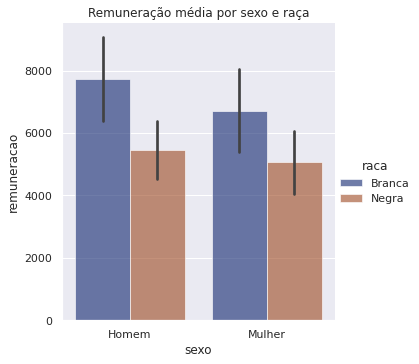

In [349]:
g_remuneracao_sexo_raca = sns.catplot(data=df, x='sexo', y='remuneracao', kind='bar', hue='raca', ci="sd", palette="dark", alpha=.6)
g_remuneracao_sexo_raca.set(title='Remuneração média por sexo e raça')

**Diferença percentual média entre remunerações de brancos e negros**.

In [350]:
get_percentage(homem_branco_remuneracao, homem_negro_remuneracao)

29.44130412691178

In [351]:
get_percentage(mulher_branca_remuneracao, mulher_negra_remuneracao)

24.588491495163915

### **2.2 Diferenças remuneratórias ao longo de toda série história**

#### **2.2.1 Evolução das diferenças remuneratórias médias entre brancos e negros ao longo de toda a série histórica**

##### **2.2.1.1 Preparando os dados**

In [352]:
# fazendo pivot do dataframe para visualizar dados ao longo dos anos
df_raca_serie_hist = pd.pivot_table(df, index='ano', values='remuneracao', columns=['raca']).reset_index()

# Calculando a diferença salarial em termos absolutos por raça
df_raca_serie_hist['dif_sal_val_abs'] = df_raca_serie_hist[['Branca', 'Negra']].apply(lambda x: x[0] - x[1], axis=1)

# Calculando a diferença percentual de salários por raça
df_raca_serie_hist['dif_perc_sal'] = df_raca_serie_hist[['Branca', 'Negra']].apply(lambda x: get_percentage(x[0], x[1]), axis=1)

In [353]:
df_raca_serie_hist.head(3)

raca,ano,Branca,Negra,dif_sal_val_abs,dif_perc_sal
0,1999,5894.40,4389.35,1505.05,25.533557
1,2000,5288.80,3967.10,1321.70,24.990546
2,2001,5415.65,3920.85,1494.80,27.601488


In [354]:
# Confirmando valores após pivot
df[df['ano']==1999].groupby('raca').mean()

,indice,ano,remuneracao
raca,,,
Branca,2.0,1999.0,5894.40
Negra,3.0,1999.0,4389.35


<a name="secao-2.2.1.2"></a>
##### **2.2.1.2 Gráfico - Evolução das diferenças remuneratórias médias entre brancos e negros ao longo de toda a série histórica**

Text(0.5, 0, 'Tempo em Anos')

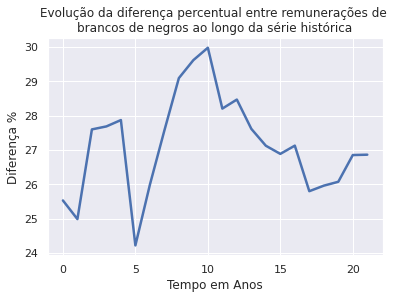

In [355]:
g = sns.lineplot(data=df_raca_serie_hist['dif_perc_sal'], palette="tab10", linewidth=2.5)
g.set(title='Evolução da diferença percentual entre remunerações de \nbrancos de negros ao longo da série histórica')
g.set_ylabel("Diferença %")
g.set_xlabel("Tempo em Anos")

In [356]:
# filtrando diferença percentual das remunerações nos anos de 2004 e 2009
df_raca_serie_hist[df_raca_serie_hist['ano'].isin([2004, 2009])][['ano', 'dif_perc_sal']]

raca,ano,dif_perc_sal
5,2004,24.224688
10,2009,29.978178


Text(0.5, 0, 'Tempo em Anos')

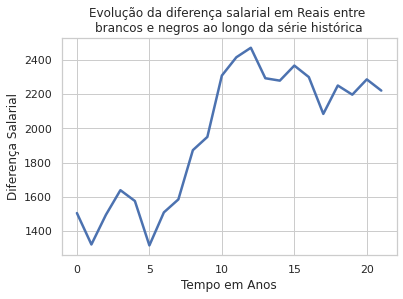

In [357]:
sns.set_theme(style="whitegrid")

g = sns.lineplot(data=df_raca_serie_hist['dif_sal_val_abs'], palette="tab10", linewidth=2.5)
g.set(title='Evolução da diferença salarial em Reais entre \nbrancos e negros ao longo da série histórica')
g.set_ylabel("Diferença Salarial")
g.set_xlabel("Tempo em Anos")

In [358]:
# filtrando diferença média das remunerações nos anos de 2004 e 2009
df_raca_serie_hist[df_raca_serie_hist['ano'].isin([2004, 2009])][['ano', 'dif_sal_val_abs']]

raca,ano,dif_sal_val_abs
5,2004,1316.2
10,2009,2307.9


#### **2.2.2 Evolução das diferenças remuneratórias médias entre homens e mulheres ao longo de toda a série histórica**

##### **2.2.2.1 Preparando os dados**

In [359]:
# Fazendo pivot do dataframe para acompanhar as diferenças salariais entre os sexos ao longo dos anos
dtf = pd.pivot_table(df, index='ano', values='remuneracao', columns=['sexo']).reset_index()

# Calculando a diferença absoluta entre salários de homens e mulheres
dtf['dif_sal_val_abs'] = dtf[['Homem', 'Mulher']].apply(lambda x: x[0] - x[1], axis=1)

# Calculando a diferença salarial percentual dos salários de homens e mulheres
dtf['dif_perc_sal'] = dtf[['Homem', 'Mulher']].apply(lambda x: get_percentage(x[0], x[1]), axis=1)

In [360]:
dtf.head(2)

sexo,ano,Homem,Mulher,dif_sal_val_abs,dif_perc_sal
0,1999,5647.95,4635.8,1012.15,17.920661
1,2000,4921.00,4334.9,586.10,11.910181


<a name="secao-2.2.2.2"></a>
##### **2.2.2.2 Gráfico - Evolução das diferenças remuneratórias médias entre homens e mulheres ao longo de toda a série histórica** 

Text(0.5, 0, 'Tempo em Anos')

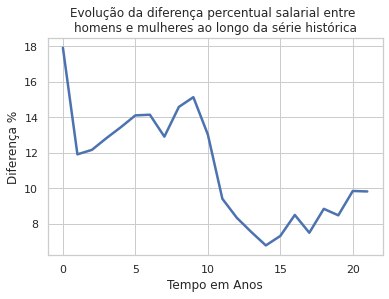

In [361]:
g = sns.lineplot(data=dtf['dif_perc_sal'], palette="tab10", linewidth=2.5)
g.set(title='Evolução da diferença percentual salarial entre \nhomens e mulheres ao longo da série histórica')
g.set_ylabel("Diferença %")
g.set_xlabel("Tempo em Anos")

In [362]:
# exibindo percentual das diferenças salariais dos anos 2008 e 2013
dtf[dtf['ano'].isin([2008, 2013])][['ano', 'dif_perc_sal']]

sexo,ano,dif_perc_sal
9,2008,15.132636
14,2013,6.773842


Text(0.5, 0, 'Tempo em Anos')

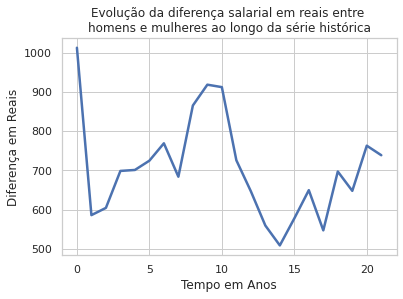

In [363]:
g = sns.lineplot(data=dtf['dif_sal_val_abs'], palette="tab10", linewidth=2.5)
g.set(title='Evolução da diferença salarial em reais entre \nhomens e mulheres ao longo da série histórica')
g.set_ylabel("Diferença em Reais")
g.set_xlabel("Tempo em Anos")

In [364]:
# exibindo as diferenças salariais dos anos 2008 e 2013
dtf[dtf['ano'].isin([2008, 2013])][['ano', 'dif_sal_val_abs']]

sexo,ano,dif_sal_val_abs
9,2008,918.15
14,2013,509.00
